## Import Dataset

In [ ]:
import kagglehub
kagglehub.dataset_download("ryosyo0/counter-strike-2-cs2-steam-reviews")

Using Colab cache for faster access to the 'counter-strike-2-cs2-steam-reviews' dataset.


'/kaggle/input/counter-strike-2-cs2-steam-reviews'

Raw Data

In [ ]:
import pandas as pd

file_path = "/kaggle/input/counter-strike-2-cs2-steam-reviews/CS2Review.csv"
df_raw = pd.read_csv(file_path)


Clean Data

In [ ]:
import pandas as pd

file_path = "/kaggle/input/counter-strike-2-cs2-steam-reviews/CS2Review_clean.csv"
df_clean = pd.read_csv(file_path)



# EDA (Jason)

## Create sample dataset

In [ ]:

# 4. Perform Balanced Sampling (5000 Positive / 5000 Negative)
n_samples = 5000

df_positive = df_raw[df_raw['voted_up'] == True].sample(n=n_samples, random_state=40)
df_negative = df_raw[df_raw['voted_up'] == False].sample(n=n_samples, random_state=40)

# Combine and Shuffle
df = pd.concat([df_positive, df_negative]).sample(frac=1, random_state=40).reset_index(drop=True)

print("✅ Drive Mounted and Balanced Dataset Ready!")
print(df['voted_up'].value_counts())
print(df.head())

✅ Drive Mounted and Balanced Dataset Ready!
voted_up
True     5000
False    5000
Name: count, dtype: int64
   recommendationid  voted_up  \
0          22254444      True   
1          17304187      True   
2         134300205     False   
3          71965237     False   
4          68783355      True   

                                              review  timestamp_created  \
0                                its an amazing game         1459871234   
1                            Don't get scammed kids.         1438286810   
2  WHAT IS THIS F****** S*** GAME. WHERE THE F***...         1678288910   
3                                                naw         1593798763   
4                                           its cool         1588934307   

   timestamp_updated language  votes_up  votes_funny  weighted_vote_score  \
0         1459871234  english         0            0             0.500000   
1         1438286810  english         0            0             0.500000   
2         16

## Clean sample dataset

In [ ]:
print(df.shape)

(10000, 23)


In [ ]:
# List the 5 columns we want to keep
my_columns = [
    'voted_up',
    'review',
    'timestamp_created',
    'weighted_vote_score',
    'author_playtime_at_review'
]

# Create a new version of the data with only these 5 columns
df = df[my_columns]

# Check the result
print("5 Columns Selected")
print(df.columns.tolist())
df.head()

5 Columns Selected
['voted_up', 'review', 'timestamp_created', 'weighted_vote_score', 'author_playtime_at_review']


,voted_up,review,timestamp_created,weighted_vote_score,author_playtime_at_review
0,True,its an amazing game,1459871234,0.500000,16866.0
1,True,Don't get scammed kids.,1438286810,0.500000,11068.0
2,False,WHAT IS THIS F****** S*** GAME. WHERE THE F***...,1678288910,0.500000,232029.0
3,False,naw,1593798763,0.500000,708.0
4,True,its cool,1588934307,0.514563,367.0


In [ ]:
# 2. Change timestamp_created to readable form
df['timestamp_created'] = pd.to_datetime(df['timestamp_created'], unit='s')

print(df[['review','timestamp_created', ]].head())
df.head()

                                              review   timestamp_created
0                                its an amazing game 2016-04-05 15:47:14
1                            Don't get scammed kids. 2015-07-30 20:06:50
2  WHAT IS THIS F****** S*** GAME. WHERE THE F***... 2023-03-08 15:21:50
3                                                naw 2020-07-03 17:52:43
4                                           its cool 2020-05-08 10:38:27


,voted_up,review,timestamp_created,weighted_vote_score,author_playtime_at_review
0,True,its an amazing game,2016-04-05 15:47:14,0.500000,16866.0
1,True,Don't get scammed kids.,2015-07-30 20:06:50,0.500000,11068.0
2,False,WHAT IS THIS F****** S*** GAME. WHERE THE F***...,2023-03-08 15:21:50,0.500000,232029.0
3,False,naw,2020-07-03 17:52:43,0.500000,708.0
4,True,its cool,2020-05-08 10:38:27,0.514563,367.0


In [ ]:
# 3. change to time(mins) to hours
df['playtime_hours'] = round((df['author_playtime_at_review'] / 60))
df.head()

,voted_up,review,timestamp_created,weighted_vote_score,author_playtime_at_review,playtime_hours
0,True,its an amazing game,2016-04-05 15:47:14,0.500000,16866.0,281.0
1,True,Don't get scammed kids.,2015-07-30 20:06:50,0.500000,11068.0,184.0
2,False,WHAT IS THIS F****** S*** GAME. WHERE THE F***...,2023-03-08 15:21:50,0.500000,232029.0,3867.0
3,False,naw,2020-07-03 17:52:43,0.500000,708.0,12.0
4,True,its cool,2020-05-08 10:38:27,0.514563,367.0,6.0


## EDA

Text(0, 0.5, 'Count')

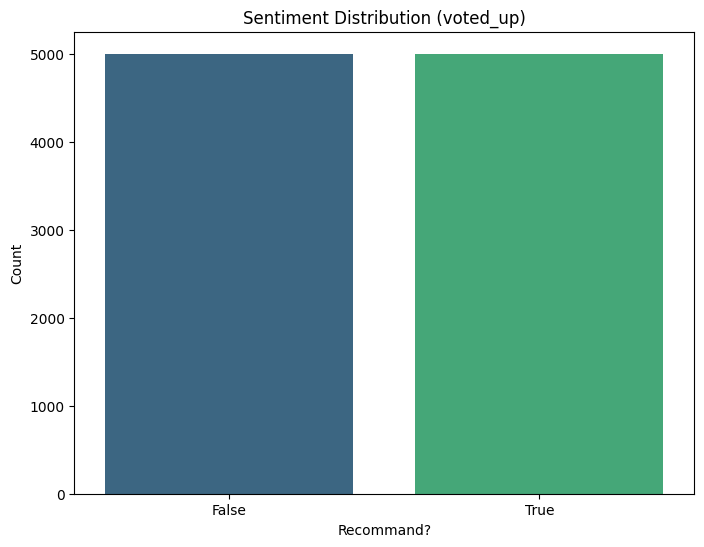

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
fig= plt.subplots(figsize=(8, 6))

# 1. Distribution of voted_up (Sentiment)
# We assign 'hue' to 'voted_up' to fix the Warning and set legend=False
sns.countplot(x='voted_up', data=df, hue='voted_up', palette='viridis', legend=False)
plt.title('Sentiment Distribution (voted_up)')
plt.xlabel("Recommand?")
plt.ylabel('Count')



Month sorted
     month  voted_up   month_dt
0  2012-08  0.200000 2012-08-01
1  2012-10  1.000000 2012-10-01
2  2012-11  0.500000 2012-11-01
3  2012-12  0.000000 2012-12-01
4  2013-01  0.333333 2013-01-01


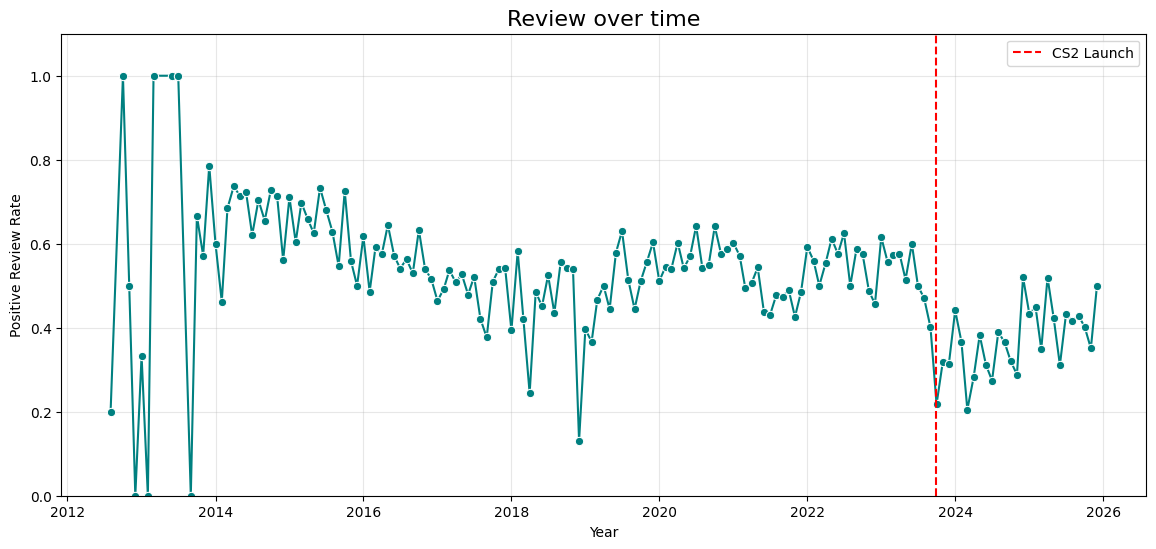

In [ ]:
# Positive review change over time

# Sort by time
df = df.sort_values('timestamp_created')

# remove day, hr, min, sec
df['month'] = df['timestamp_created'].dt.to_period('M')

# give month col index so that could be plot
monthly_trend = df.groupby('month')['voted_up'].mean().reset_index()
monthly_trend['month_dt'] = monthly_trend['month'].dt.to_timestamp()
print("Month sorted")
print(monthly_trend.head())

# plot graph
plt.figure(figsize=(14, 6))
sns.lineplot(data=monthly_trend, x='month_dt', y='voted_up', marker='o', color='teal')

# Add a line for the CS2 Launch for context
plt.axvline(pd.to_datetime('2023-09-27'), color='red', linestyle='--', label='CS2 Launch')

plt.title(f'Review over time', fontsize=16)
plt.ylabel('Positive Review Rate')
plt.xlabel('Year')
plt.ylim(0, 1.1)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


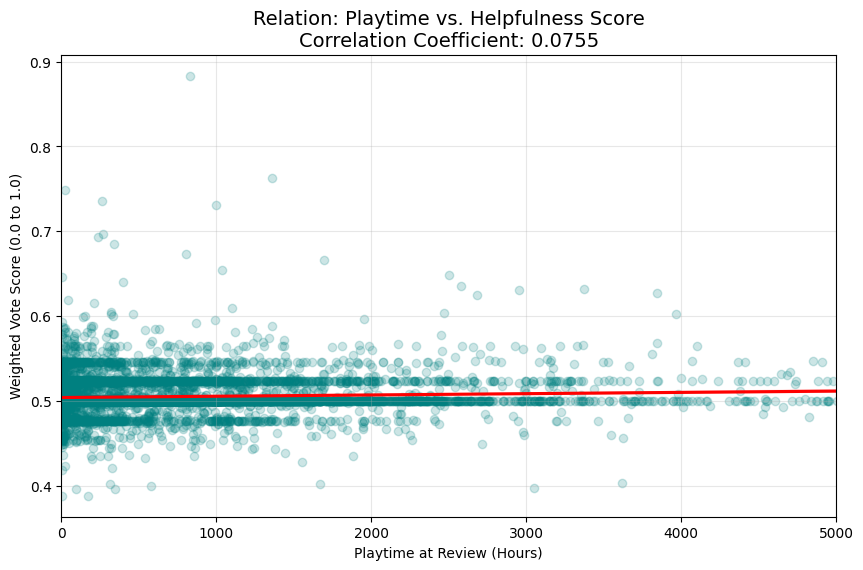

The Correlation Coefficient is: 0.0755


In [ ]:
# Relatiob between weighted_vote_score and playtime_hours

correlation = df['playtime_hours'].corr(df['weighted_vote_score'])

# 4. Create a Scatter Plot with a Regression Line
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='playtime_hours', y='weighted_vote_score',
            scatter_kws={'alpha':0.2, 'color':'teal'},
            line_kws={'color':'red'})

# 5. Styling
plt.title(f'Relation: Playtime vs. Helpfulness Score\nCorrelation Coefficient: {correlation:.4f}', fontsize=14)
plt.xlabel('Playtime at Review (Hours)')
plt.ylabel('Weighted Vote Score (0.0 to 1.0)')
plt.xlim(0, 5000) # Focusing on the 0-5000 hour range for better visibility
plt.grid(True, alpha=0.3)
plt.show()

print(f"The Correlation Coefficient is: {correlation:.4f}")

## Text cleaning and Visualizing for Model training

In [ ]:
import re

# 1. Define the Cleaning Function
def clean_review_text(text):
    if not isinstance(text, str):
        return ""

    # Ensure text is string for safety
    text = str(text)

    # A. Remove '/n/s' literal patterns and actual newlines/carriage returns
    # This interprets '/n/s' variations as unwanted separators.
    text = re.sub(r'/\s*n/\s*s', ' ', text) # Remove literal /n/s variations
    text = text.replace('\n', ' ').replace('\r', ' ') # Handle actual newlines

    # B. Remove HTML tags (Steam reviews often have <br> or [h1] tags)
    text = re.sub(r'<.*?>|\[.*?\]', ' ', text)

    # C. Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)

    # D. Retain punctuation and emojis, and normalize (Lowercase and remove extra spaces)
    # By not using an aggressive character removal regex (like [^a-zA-Z\s]),
    # punctuation and emojis are naturally retained.
    #text = text.lower().strip() #roBERTa trained with capitals in mind
    text = " ".join(text.split()) # Replace multiple spaces with a single space

    return text

# 2. Apply it to your dataset
print("🧹 Cleaning text... this may take a moment.")
df['cleaned_review'] = df['review'].apply(clean_review_text)

# 3. Quality Check: Remove reviews that are too short after cleaning
# (e.g., reviews that were just emojis and are now empty)
df = df[df['cleaned_review'].str.len() > 5].copy()

print(f"✅ Step 1 Complete! Remaining reviews: {len(df)}")
display(df[['review', 'cleaned_review']].head())

🧹 Cleaning text... this may take a moment.
✅ Step 1 Complete! Remaining reviews: 8464


,review,cleaned_review
8116,this game confirmed to be dooky.,this game confirmed to be dooky.
1602,Game has become a cesspool for cheaters. Cant ...,Game has become a cesspool for cheaters. Cant ...
7984,CSGO>CS2 Muito mal otimizado ainda,CSGO>CS2 Muito mal otimizado ainda
5658,One of the best multi-player games ever made.,One of the best multi-player games ever made.
815,Russians.,Russians.


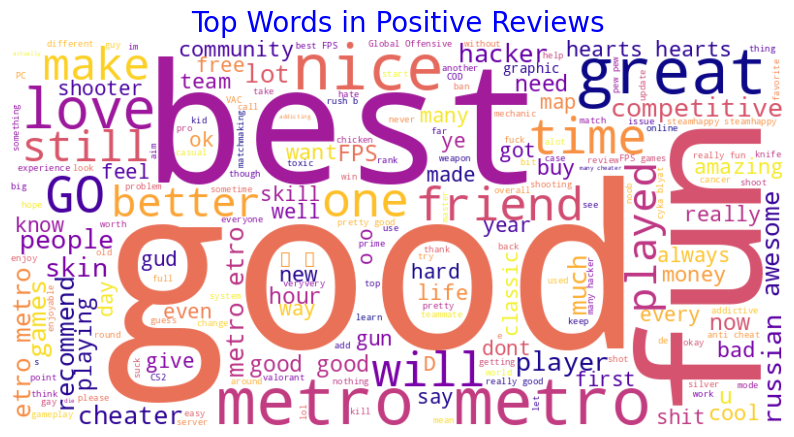

In [ ]:
# WordCloud anaylsis --> Frequency of words appearence
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# 1. Add some extra "boring" words to STOPWORDS so they don't hide the interesting words
# (Words like 'game', 'play', 'cs' are in every review and don't tell us much)
custom_stopwords = set(STOPWORDS)
custom_stopwords.update(["game", "play", "cs", "csgo", "counter", "strike", "steam", "valve"])

# 2. Split the data
good_reviews = " ".join(df[df['voted_up'] == True]['cleaned_review'])
bad_reviews = " ".join(df[df['voted_up'] == False]['cleaned_review'])

# 3. Generate Word Clouds
wc_good = WordCloud(width=800, height=400, background_color='white',
                    stopwords=custom_stopwords, colormap='plasma').generate(good_reviews)

wc_bad = WordCloud(width=800, height=400, background_color='white',
                   stopwords=custom_stopwords, colormap='magma').generate(bad_reviews)

# 4. Plot side-by-side
plt.figure(figsize=(10, 6))
plt.imshow(wc_good, interpolation='bilinear')
plt.title('Top Words in Positive Reviews', fontsize=20, color='blue')
plt.axis('off')
plt.show()


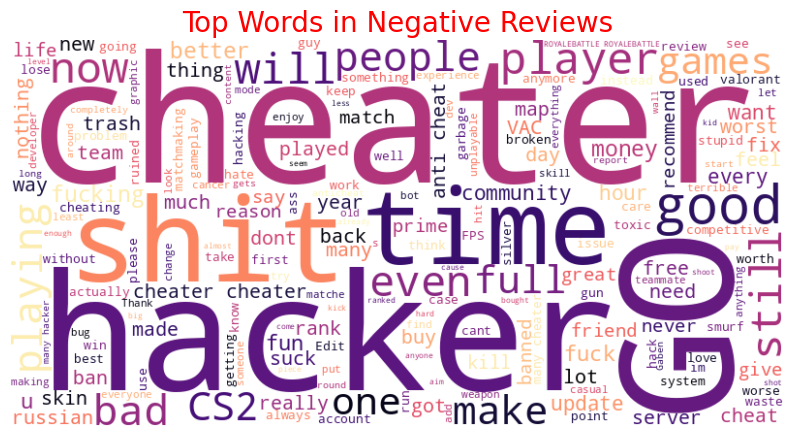

In [ ]:
plt.figure(figsize=(10, 6))
plt.imshow(wc_bad, interpolation='bilinear')
plt.title('Top Words in Negative Reviews', fontsize=20, color='red')
plt.axis('off')
plt.show()

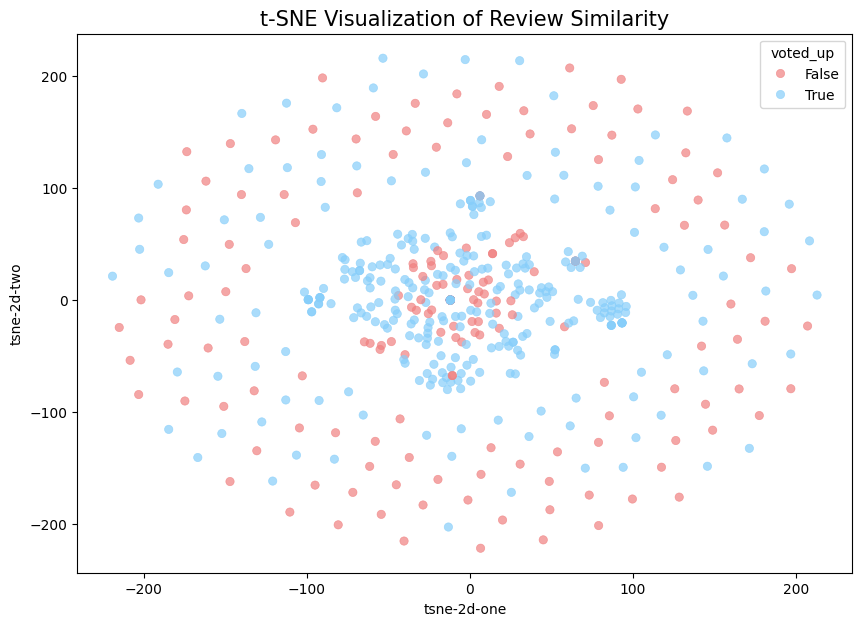

In [ ]:
# Checking do text data have clear Separability
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.manifold import TSNE
import pandas as pd
import seaborn as sns

# 1. Convert Text to Numbers (Vectors)
# We limit to 500 reviews for speed in this step
sub_df = df.head(500).copy()
tfidf = TfidfVectorizer(max_features=500, stop_words='english')
data_vectorized = tfidf.fit_transform(sub_df['cleaned_review'])

# 2. Run t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
tsne_results = tsne.fit_transform(data_vectorized.toarray())

# 3. Create a DataFrame for Plotting
sub_df['tsne-2d-one'] = tsne_results[:,0]
sub_df['tsne-2d-two'] = tsne_results[:,1]

# 4. Plot the results with Custom Colors
plt.figure(figsize=(10, 7))

# Define your custom color map here
custom_colors = {True: "#87CEFA", False: "#F08080"}
# Note: If your data is 1 and 0, use {1: "blue", 0: "red"}

sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="voted_up",
    palette=custom_colors,  # <--- Apply the dictionary here
    data=sub_df,
    alpha=0.7,
    edgecolor=None
)

plt.title("t-SNE Visualization of Review Similarity", fontsize=15)
plt.show()

# Model (Sho)

## Data preprocessing

In [ ]:
import torch
import numpy as np
import torch.nn.functional as F
import matplotlib.pyplot as plt

from torch.utils.data import Dataset, DataLoader

from transformers import (
    AutoTokenizer,
    AutoModelForSequenceClassification,
    Trainer,
    TrainingArguments,
    TrainerCallback
)

from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    precision_score,
    recall_score
)

from datasets import Dataset
import random, numpy as np

MAX_SEQ_LENGTH = 512
SEED = 42

random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
torch.cuda.manual_seed_all(SEED)


roberta = "cardiffnlp/twitter-roberta-base-sentiment"

# ======================================================
# 2. Label Mapping (Steam → Binary)
# ======================================================
# False = Negative (0), True = Positive (1)
df["label"] = df["voted_up"].map({False: 0, True: 1})

# ======================================================
# 3. Train / Val / Test Split (80 / 10 / 10)
# ======================================================
train_df, temp_df = train_test_split(
    df[["cleaned_review", "label"]],
    test_size=0.2,
    stratify=df["label"],
    random_state=SEED
)

val_df, test_df = train_test_split(
    temp_df,
    test_size=0.5,
    stratify=temp_df["label"],
    random_state=SEED
)

# =====================================
# 6️⃣ Dataset & DataLoader (Memory-efficient)
# =====================================
class ReviewDataset(torch.utils.data.Dataset):
    def __init__(self, texts, labels, tokenizer, max_len):
        self.texts = texts.reset_index(drop=True)
        self.labels = labels.reset_index(drop=True)
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = str(self.texts.iloc[idx])

        encoding = self.tokenizer(
            text,
            padding="max_length",
            truncation=True,
            max_length=self.max_len,
            return_tensors="pt"
        )

        return {
            "input_ids": encoding["input_ids"].squeeze(0),
            "attention_mask": encoding["attention_mask"].squeeze(0),
            # 🚨 CRITICAL LINE — force Python int
            "labels": int(self.labels.iloc[idx])
        }


In [ ]:
BATCH_SIZE = 16

# Load tokenizer
roberta_model_name = "cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(roberta_model_name)

train_dataset = ReviewDataset(train_df['cleaned_review'], train_df['label'], tokenizer, MAX_SEQ_LENGTH)
val_dataset   = ReviewDataset(val_df['cleaned_review'], val_df['label'], tokenizer, MAX_SEQ_LENGTH)
test_dataset  = ReviewDataset(test_df['cleaned_review'], test_df['label'], tokenizer, MAX_SEQ_LENGTH)

from transformers import DataCollatorWithPadding

data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

train_loader = DataLoader(
    train_dataset,
    batch_size=BATCH_SIZE,
    shuffle=True,
    collate_fn=data_collator
)

val_loader = DataLoader(
    val_dataset,
    batch_size=BATCH_SIZE,
    collate_fn=data_collator
)

test_loader = DataLoader(
    test_dataset,
    batch_size=BATCH_SIZE,
    collate_fn=data_collator
)

print("✅ Datasets & DataLoaders ready")


# ======================================================
# 6. Metric Functions (Binary, Probability-Based)
# ======================================================
def compute_metrics_from_logits(logits, labels):
    probs = torch.softmax(torch.tensor(logits), dim=1)

    # Cardiff RoBERTa: 0=neg,1=neu,2=pos → binary
    positive_probs = probs[:, 2]
    preds = (positive_probs >= 0.5).int().numpy()

    return {
        "accuracy": accuracy_score(labels, preds),
        "f1_macro": f1_score(labels, preds, average="macro"),
        "precision": precision_score(labels, preds, zero_division=0),
        "recall": recall_score(labels, preds, zero_division=0),
    }

def binary_cross_entropy(model, dataloader, device):
    model.eval()
    loss_fn = torch.nn.CrossEntropyLoss()

    total_loss = 0.0
    total_count = 0

    with torch.no_grad():
        for batch in dataloader:
            labels = torch.tensor(
                [int(x) for x in batch["labels"]],
                dtype=torch.long,
                device=device
            )

            inputs = {
                k: v.to(device)
                for k, v in batch.items()
                if k != "labels"
            }

            outputs = model(**inputs)
            loss = loss_fn(outputs.logits, labels)

            total_loss += loss.item() * labels.size(0)
            total_count += labels.size(0)

    return total_loss / total_count


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/747 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

✅ Datasets & DataLoaders ready


## roBerta Model


In [ ]:
BATCH_SIZE = 16
POS_THRESHOLD = 0.5

In [ ]:
def evaluate_model(model, dataloader, device):
    model.eval()

    all_preds = []
    all_labels = []

    with torch.no_grad():
        for batch in dataloader:
            labels = batch["labels"].to(device)

            inputs = {
                k: v.to(device)
                for k, v in batch.items()
                if k != "labels"
            }

            outputs = model(**inputs)
            preds = torch.argmax(outputs.logits, dim=1)

            all_preds.extend(preds.cpu().tolist())
            all_labels.extend(labels.cpu().tolist())

    return {
        "accuracy": accuracy_score(all_labels, all_preds),
        "f1_macro": f1_score(all_labels, all_preds, average="macro"),
        "precision_macro": precision_score(all_labels, all_preds, average="macro", zero_division=0),
        "recall_macro": recall_score(all_labels, all_preds, average="macro", zero_division=0),
    }



# ======================================================
# 7. Baseline Model (UNTUNED)
# ======================================================
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

baseline_model = AutoModelForSequenceClassification.from_pretrained(
    roberta,
    use_safetensors=True
)
baseline_model.to(device)

baseline_metrics = evaluate_model(
    baseline_model,
    test_loader,
    device
)

baseline_metrics["bce"] = binary_cross_entropy(
    baseline_model,
    test_loader,
    device
)

print("📊 Baseline (Pretrained, 3-class) Metrics")
for k, v in baseline_metrics.items():
    print(f"{k}: {v:.4f}")



pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

📊 Baseline (Pretrained, 3-class) Metrics
accuracy: 0.4876
f1_macro: 0.3602
precision_macro: 0.4422
recall_macro: 0.3134
bce: 1.3963


In [ ]:
LEARNING_RATE = 1e-5
EPOCHS = 20
BATCH_SIZE = 16
POS_THRESHOLD = 0.5

In [ ]:
from tqdm.auto import tqdm
from torch.optim import AdamW

finetuned_model = AutoModelForSequenceClassification.from_pretrained(
    roberta,
    num_labels=2,
    ignore_mismatched_sizes=True,
    use_safetensors=True
)

finetuned_model.to(device)

optimizer = AdamW(
    finetuned_model.parameters(),
    lr=LEARNING_RATE
)

finetune_history = {
    "epoch": [],
    "accuracy": [],
    "f1_macro": [],
    "bce": []
}

for epoch in range(EPOCHS):
    finetuned_model.train()

    train_loop = tqdm(train_loader, desc=f"🚀 Finetuning Epoch {epoch + 1}/{EPOCHS}")

    for batch in train_loop:
        labels = batch["labels"].to(device)

        inputs = {
            k: v.to(device)
            for k, v in batch.items()
            if k != "labels"
        }

        outputs = finetuned_model(**inputs, labels=labels)
        loss = outputs.loss

        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        train_loop.set_postfix(loss=loss.item())

    val_metrics = evaluate_model(
        finetuned_model,
        val_loader,
        device
    )

    val_bce = binary_cross_entropy(
        finetuned_model,
        val_loader,
        device
    )

    print(
        f"✅ Val | Acc: {val_metrics['accuracy']:.4f} | "
        f"F1: {val_metrics['f1_macro']:.4f} | "
        f"BCE: {val_bce:.4f}"
    )

    finetune_history["epoch"].append(epoch + 1)
    finetune_history["accuracy"].append(val_metrics["accuracy"])
    finetune_history["f1_macro"].append(val_metrics["f1_macro"])
    finetune_history["bce"].append(val_bce)

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment and are newly initialized because the shapes did not match:
- classifier.out_proj.weight: found shape torch.Size([3, 768]) in the checkpoint and torch.Size([2, 768]) in the model instantiated
- classifier.out_proj.bias: found shape torch.Size([3]) in the checkpoint and torch.Size([2]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.



🚀 Finetuning Epoch 1/20
✅ Val | Acc: 0.8452 | F1: 0.8433 | BCE: 0.3503

🚀 Finetuning Epoch 2/20
✅ Val | Acc: 0.8428 | F1: 0.8386 | BCE: 0.4086

🚀 Finetuning Epoch 3/20
✅ Val | Acc: 0.8511 | F1: 0.8504 | BCE: 0.3570

🚀 Finetuning Epoch 4/20
✅ Val | Acc: 0.8322 | F1: 0.8309 | BCE: 0.4332

🚀 Finetuning Epoch 5/20
✅ Val | Acc: 0.8369 | F1: 0.8359 | BCE: 0.5243

🚀 Finetuning Epoch 6/20
✅ Val | Acc: 0.8369 | F1: 0.8361 | BCE: 0.5429

🚀 Finetuning Epoch 7/20
✅ Val | Acc: 0.8322 | F1: 0.8305 | BCE: 0.6575

🚀 Finetuning Epoch 8/20
✅ Val | Acc: 0.8452 | F1: 0.8446 | BCE: 0.7239

🚀 Finetuning Epoch 9/20
✅ Val | Acc: 0.8487 | F1: 0.8473 | BCE: 0.7112

🚀 Finetuning Epoch 10/20
✅ Val | Acc: 0.8381 | F1: 0.8354 | BCE: 0.6983

🚀 Finetuning Epoch 11/20
✅ Val | Acc: 0.8369 | F1: 0.8354 | BCE: 0.7689

🚀 Finetuning Epoch 12/20
✅ Val | Acc: 0.8463 | F1: 0.8453 | BCE: 0.7780

🚀 Finetuning Epoch 13/20
✅ Val | Acc: 0.8357 | F1: 0.8346 | BCE: 0.7953

🚀 Finetuning Epoch 14/20
✅ Val | Acc: 0.8322 | F1: 0.8299 |

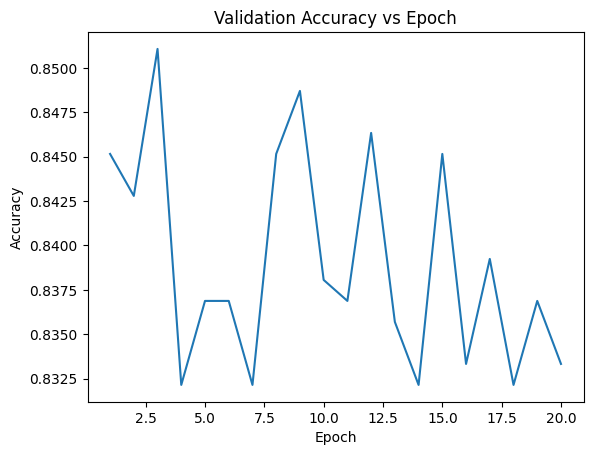

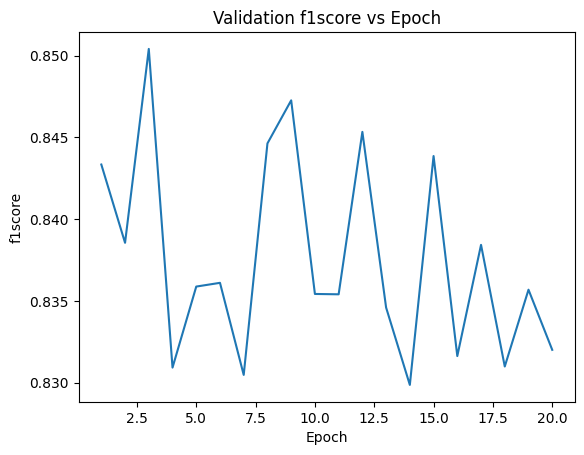

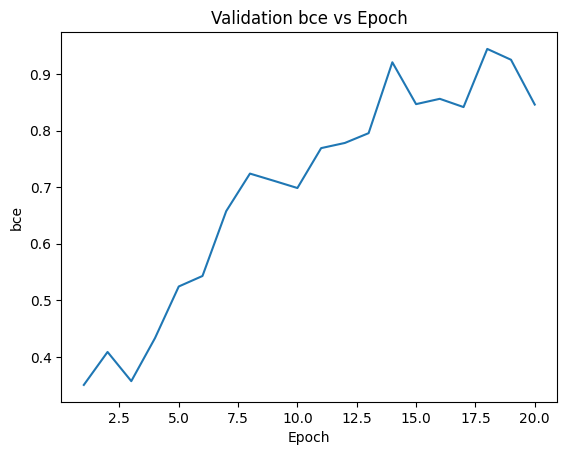

In [ ]:
plt.figure()
plt.plot(finetune_history["epoch"], finetune_history["accuracy"])
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Validation Accuracy vs Epoch")
plt.show()

plt.figure()
plt.plot(finetune_history["epoch"], finetune_history["f1_macro"])
plt.xlabel("Epoch")
plt.ylabel("f1score")
plt.title("Validation f1score vs Epoch")
plt.show()

plt.figure()
plt.plot(finetune_history["epoch"], finetune_history["bce"])
plt.xlabel("Epoch")
plt.ylabel("bce")
plt.title("Validation bce vs Epoch")
plt.show()



In [ ]:
# ======================================================
# FINAL MODEL — Threshold tuning + BCE
# ======================================================
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
finetuned_model.to(device)
finetuned_model.eval()

all_probs = []
all_labels = []

with torch.no_grad():
    for batch in test_loader:   # FINAL trained model
        labels = batch["labels"].to(device)

        inputs = {
            k: v.to(device)
            for k, v in batch.items()
            if k != "labels"
        }

        outputs = finetuned_model(**inputs)
        probs = torch.softmax(outputs.logits, dim=1)[:, 1]  # Positive prob

        all_probs.append(probs)
        all_labels.append(labels)

all_probs = torch.cat(all_probs)
all_labels = torch.cat(all_labels).float()

# ======================================================
# Binary Cross Entropy (probability-based)
# ======================================================
bce = F.binary_cross_entropy(all_probs, all_labels)

# ======================================================
# Threshold tuning (F1)
# ======================================================
all_probs_np = all_probs.cpu().numpy()
all_labels_np = all_labels.cpu().numpy()

best_f1 = 0
best_t = 0

for t in np.arange(0.3, 0.5, 0.6):
    preds = (all_probs_np >= t).astype(int)
    f1 = f1_score(all_labels_np, preds)

    if f1 > best_f1:
        best_f1 = f1
        best_t = t

# ======================================================
# Final metrics at best threshold
# ======================================================
final_preds = (all_probs_np >= best_t).astype(int)

print(f"✅ FINAL MODEL — Best Threshold: {best_t:.2f}")
print("Accuracy :", accuracy_score(all_labels_np, final_preds))
print("F1       :", f1_score(all_labels_np, final_preds))
print("Precision:", precision_score(all_labels_np, final_preds))
print("Recall   :", recall_score(all_labels_np, final_preds))
print("BCE      :", bce.item())

✅ FINAL MODEL — Best Threshold: 0.30
Accuracy : 0.820543093270366
F1       : 0.8095238095238095
Precision: 0.7995049504950495
Recall   : 0.8197969543147208
BCE      : 0.9093425273895264


# Data Pipeline & Result (Ling)

To ensure the efficiency of our group's collaboration, following code are not suppposed to be executed in Colab. I have included it here solely for demonstration purposes.

## Data Collection

## Data Cleaning

## Model Prediction

In [ ]:
import os

# Define save path
output_dir = "./saved_cs2_roberta_model"

# Create directory if it doesn't exist
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Save model weights and tokenizer configuration
print(f"💾 Saving model to {output_dir}...")
finetuned_model.save_pretrained(output_dir)
tokenizer.save_pretrained(output_dir)
print("✅ Model and Tokenizer saved successfully!")

In [ ]:
from tqdm.auto import tqdm

print("\n🚀 Starting prediction on FULL dataset...")

# 1. Prepare full dataset (using the originally loaded df_raw)
# Note: We must apply the exact same cleaning logic to the full dataset
# Handle NaN values first to prevent errors
df_raw['review'] = df_raw['review'].fillna("")

print("🧹 Cleaning full dataset text...")
df_raw['cleaned_review'] = df_raw['review'].apply(clean_review_text)

# 2. Create Dataset and DataLoader for inference
# Reusing the ReviewDataset class defined earlier
# Note: Map voted_up to 0/1. We fill missing labels with 0 (dummy),
# as we only need the inputs for prediction.
df_raw["label_numeric"] = df_raw["voted_up"].map({False: 0, True: 1}).fillna(0).astype(int)

full_inference_dataset = ReviewDataset(
    df_raw['cleaned_review'],
    df_raw['label_numeric'],
    tokenizer,
    MAX_SEQ_LENGTH
)

# Use a larger batch_size for faster inference (reduce to 16 if OOM occurs)
inference_batch_size = 32
full_loader = DataLoader(
    full_inference_dataset,
    batch_size=inference_batch_size,
    collate_fn=data_collator,
    shuffle=False # IMPORTANT: Do not shuffle during inference!
)

# 3. Start inference loop
finetuned_model.eval()
all_predictions = []
all_probabilities = []

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
finetuned_model.to(device)

with torch.no_grad():
    # Use tqdm to show a progress bar
    for batch in tqdm(full_loader, desc="Predicting"):
        inputs = {
            k: v.to(device)
            for k, v in batch.items()
            if k != "labels"
        }

        outputs = finetuned_model(**inputs)

        # Get probabilities (Softmax)
        probs = torch.softmax(outputs.logits, dim=1)[:, 1] # Get probability for the Positive class

        # Get predicted class (based on best_t found earlier; defaults to 0.5 if not set)
        threshold = best_t if 'best_t' in locals() else 0.5
        preds = (probs >= threshold).int()

        all_predictions.extend(preds.cpu().tolist())
        all_probabilities.extend(probs.cpu().tolist())

# 4. Save results back to DataFrame
df_raw['predicted_label'] = all_predictions
df_raw['predicted_prob'] = all_probabilities

# 5. Save as CSV
output_csv = "cs2_full_predictions.csv"
df_raw.to_csv(output_csv, index=False)

print(f"✅ Prediction complete! Results saved to {output_csv}")
print(df_raw[['review', 'voted_up', 'predicted_label', 'predicted_prob']].head())

## Result Analysis